# Metadata

```yaml
Course:  DS 5100
Module:  07 Python Classes
Topic:   HW 07 Stock Class
Author:  R.C. Alvarado
Date:    7 July 2023
```

# Student Info

* Name:  Sae'von Palmer
* Net UD: sp8me
* URL of this file in GitHub:

# Instructions

In your **private course repo on Rivanna**, use this Jupyter notebook and the data file described to write code that performs the tasks below. 

Save your notebook in the `M07` directory.

Remember to add and commit these files to your repo. 

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save the notebook as a PDF and upload it to GradeScope, following the instructions.

**TOTAL POINTS: 12**

# Overview

In this assignment you will define a class and use it to perform the requested tasks.

Before answering the questions, read the market data from `apple_data.csv` into a Pandas dataframe. The file is in the HW for this module in the course repo.

# Setting Up

In [1]:
import pandas as pd
import numpy as np

# Prepare the Data

Read in the dataset from the attached file `apple_data.csv` using `pd.read_csv()`.  

In [3]:
df = pd.read_csv("apple_data-2.csv")

# Task 1 

(5 PTS) 

Define a class with these features:

**Class Name**: `Stock`

**Attributes**:
- `ticker`: a string to hold the stock symbol
- `sector`: a string to hold the sector name
- `prices`: a dataframe to hold the prices for the stock

**Methods**:
- `print_sector` to just print out the sector string.
- `get_row_count` to count the number of rows in the price dataframe. Set an attribute "price_records" equal to this count.
-`__init__` to build objects. Initialize with the three attribute values passed to the constructor.

In [4]:
class Stock:
    
    "This is a class called Stock that holds three attributes and two methods"
    
    def __init__(self, ticker: str, sector: str, prices: pd.DataFrame):
        self.ticker = ticker
        self.sector = sector
        self.prices = prices
        self.price_records = 0  

    def print_sector(self):
        print(self.sector)

    def get_row_count(self):
        self.price_records = len(self.prices)
        return self.price_records
    

# Task 2

(1 PT) 

Create an instance of your class with the these initial values: 
- `ticker`: 'AAPL'
- `sector`: 'technology'
- `prices`: _the imported price dataframe_
          
Then Use the dot operator to print the stock's ticker.   

In [5]:

# Create an instance of the Stock class
applestock = Stock("AAPL", "technology", df)

# Print the stock's ticker using the dot operator
print(applestock.ticker)

AAPL


# Task 3 

(1 PT) 

Use the `print_sector()` method to print the sector.

In [6]:
applestock.print_sector()

technology


# Task 4 

(2 PTS) 

Use the `get_row_count()` method to compute the number of price records and set price_records.

Use the dot operator to access the stock's price_records, printing the result.

In [7]:
# Compute and set the number of price records
applestock.get_row_count()

# Access and print the price_records attribute
print(applestock.price_records)

135


# Task 5

(1 PT) 

Add a new column called `'month'` to the `prices` attribute and put the month number there. 

Hint: You can use `.apply()` with a lambda function to split the month string and keep the second element.

In [12]:

df['date'] = pd.to_datetime(df['date'])


applestock.prices['month'] = applestock.prices['date'].apply(lambda x: x.month)

# Display the first few rows to check the new column
print(applestock.prices.head())


        date   adj_close  month
0 2020-01-02  298.829956      1
1 2020-01-03  295.924713      1
2 2020-01-06  298.282715      1
3 2020-01-07  296.879883      1
4 2020-01-08  301.655548      1


# Task 6

(1 PT)

Use `.groupby()` to compute the mean `adj_close` by month. Save your result is a dataframe, not a series.

In [11]:
# Group by 'month' and compute the mean of 'adj_close', keeping the result as a DataFrame
mean_adj_close = applestock.prices.groupby('month', as_index=False)['adj_close'].mean()

# Display the resulting DataFrame
print(mean_adj_close)

   month   adj_close
0      1  310.337596
1      2  310.271843
2      3  261.735581
3      4  271.650839
4      5  309.785164
5      6  345.806360
6      7  378.385999


In [40]:
# Another method
# my_stock.prices.groupby('month').agg({'adj_close':'mean'})

# Task 7

(1 PT)

Plot the mean `adj_close` by month using a simple line plot.

<Axes: >

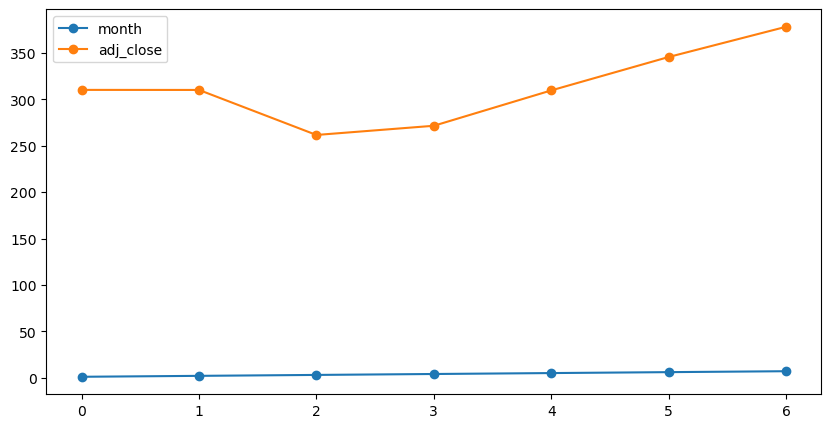

In [13]:
# Plot of the mean
mean_adj_close.plot(kind='line', marker='o', figsize=(10, 5))